<a href="https://colab.research.google.com/github/ddutta111/UK-House-SalePrice-Predictive-Modelling/blob/main/Predict_UK_House_Prices_CatBoost_%26_TfDf_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Question Description**

The UK housing market is a critical sector that significantly impacts the economy, individuals, and businesses alike. Accurately predicting future house prices is essential for various stakeholders, including real estate investors, mortgage lenders, homebuyers, and policymakers. As an analyst the objective of this project is to find a robust machine learning model that forecasts future house prices based on historical housing data, including property characteristics, location factors, etc.

# **Business Goal**

As an analyst, the primary goal is to develop a **predictive model** that accurately forecasts future UK house prices. This involves cleaning and analyzing teh available historical housing data, selecting relevant features, and applying machine learning algorithms to create a model that can predict house prices based on various attributes. The focus is on delivering a model that is both accurate and interpretable, enabling stakeholders to make informed decisions about property investments, pricing, and market trends. Additionally, evaluating model performance and identifying the most influential factors driving price changes is key to enhancing the model’s value.









# **Dataset Description**

The dataset includes a variety of property attributes that may influence the sale price of homes. The training dataset contains features describing the characteristics of each property, and the test dataset contains the same features, but without the target variable SalePrice.

Key Variables:

```MSSubClass:``` Type of dwelling involved in the sale.

Example values: 1-Story, 2-Story, Duplex, etc.

```MSZoning:``` General zoning classification of the sale.

Example values: Residential Low Density, Commercial, Industrial, etc.

```LotFrontage:``` Linear feet of street connected to the property.

```LotArea:``` Lot size in square feet.

```Street:``` Type of road access (Gravel or Paved).

```Alley:``` Type of alley access (Gravel, Paved, or None).

```LotShape:``` General shape of the property (Regular, Irregular, etc.).

```LandContour:``` Flatness of the property (Level, Hillside, Depression, etc.).

```Utilities:``` Type of utilities available (Electricity, Water, etc.).

```LotConfig:``` Lot configuration (Corner, Inside, etc.).

```LandSlope:``` Slope of the property (Gentle, Moderate, Severe).

```Neighborhood:``` Physical locations within the city limits.

```Condition1:``` Proximity to main conditions (Adjacent to street, Railroad, etc.).

```BldgType:``` Type of dwelling (Single-family Detached, Duplex, etc.).

```HouseStyle:``` Style of dwelling (1-Story, 2-Story, Split Level, etc.).

```OverallQual:``` Overall material and finish quality of the house (Rating 1 to 10).

```OverallCond:``` Overall condition of the house (Rating 1 to 10).

```YearBuilt:``` Year the house was built.

```YearRemodAdd:``` Year the house was remodeled.

```RoofStyle:``` Type of roof (Gable, Hip, etc.).

```RoofMatl:``` Roofing material (Wood Shingles, Gravel, etc.).

```Exterior1st/2nd:``` Exterior covering of the house (Vinyl Siding, Stucco, etc.).

```MasVnrType:``` Masonry veneer type (Brick Face, None, Stone, etc.).

```MasVnrArea:``` Masonry veneer area in square feet.

```ExterQual:``` Exterior material quality (Excellent, Good, Fair, etc.).

```Foundation:``` Type of foundation (Poured Concrete, Slab, etc.).

```BsmtQual:``` Basement height (Excellent, Good, Typical, etc.).

```BsmtCond:``` General condition of the basement (Excellent, Fair, etc.).

```BsmtExposure:``` Walkout or garden level walls (Good, Average, None, etc.).

```BsmtFinType1/2:``` Basement finished area rating (Good Living Quarters, Rec Room, etc.).

```TotalBsmtSF:``` Total square feet of the basement.

```Heating:``` Type of heating (Gas, Wall Furnace, etc.).

```HeatingQC:``` Heating quality and condition (Excellent, Good, Fair, etc.).

```CentralAir:``` Central air conditioning (Yes, No).

```Electrical:``` Electrical system (Standard Circuit Breakers, Fuse Box, etc.).

```1stFlrSF / 2ndFlrSF:``` First and second floor square feet.

```GrLivArea:``` Above grade (ground) living area square feet.

```FullBath / HalfBath:``` Number of full and half bathrooms above grade.

```Bedroom:``` Number of bedrooms above grade.

```Kitchen:``` Number of kitchens above grade.

```KitchenQual:``` Kitchen quality (Excellent, Good, Average, etc.).

```TotRmsAbvGrd:``` Total rooms above grade (excluding bathrooms).

```Functional:``` Home functionality rating.

```Fireplaces:``` Number of fireplaces.

```GarageType:``` Type of garage (Attached, Detached, None, etc.).

```GarageArea:``` Size of the garage in square feet.

```PavedDrive:``` Paved driveway (Yes, Partial, No).

```PoolArea:``` Pool area in square feet.

```Fence:``` Fence quality (Good Privacy, Minimum Wood, None, etc.).

```MiscFeature:``` Miscellaneous features like sheds, tennis courts, etc.

```SaleType:``` Type of sale (Warranty Deed, Cash, etc.).

```SaleCondition:``` Condition of the sale (Normal Sale, Abnormal Sale, etc.).

After Exploratory Data Analysis step, we'll build two machine learning models that predict house prices (SalePrice) in the UK, using property attributes from the UK house price dataset. And, we will see which model gives better evaluation, enabling stakeholders to gain insights into which factors most significantly influence property prices.

This structured approach will help us predict house prices efficiently, supporting informed decision-making in the UK real estate market.

# **Importing the necessary Python Libraries**

First we import the necessary libraries below in order to begin our Exploratory Data Analysis & Predictive Modelling & follwing that we load the dataset of UK house prices (collected from Kaggle)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
!pip install catboost
!pip install tensorflow_decision_forests
from catboost import CatBoostRegressor
import tensorflow_decision_forests as tfdf
import tensorflow as tf

# **Importing the dataset (train dataset & test dataset)**

In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# **Exploratory Analysis of the Datasets**

**Train_dataset and Test_dataset shapes**

The training dataset, which contains 1460 rows and 81 columns. Each row represents a property, and the columns represent features (including the target variable, SalePrice).

The test dataset, which has 1459 rows and 80 columns. The test dataset has one less column because it does not include the SalePrice column (the target variable we aim to predict).

In [ ]:
print("Full dataset shape is {}".format(train_data.shape))
print("Full dataset shape is {}".format(test_data.shape))

Full dataset shape is (1460, 81)
Full dataset shape is (1459, 80)


# Viewing the train_data and test_data

Below, we give a  quick preview of the first few rows of the dataset.

In [ ]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Below, we chcek the detailed insight into the dataset’s structure (for both train_data and test_data), including data types and potential missing values, which is crucial for handling missing data and preprocessing steps.

In [ ]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Descriptive analysis of the train_data

In [ ]:
print(train_data.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

A brief interpretation of the key descriptive statistics above tells us:

**1. General Data (Count, Mean, Min, Max, etc.):**
Count: Represents the number of non-null values for each feature.

Most features have 1460 non-null values, but some, like LotFrontage (1201 non-null) and MasVnrArea (1452 non-null), have missing data.

- **Mean:** The average value for each feature. For example:

LotArea (lot size) has an average of 10,516 square feet.

OverallQual (overall quality) averages around 6.1, indicating most homes have a moderate quality rating.

SalePrice (target) has an average of 180,921.

**2. Standard Deviation (std):** Shows the variability in the data.

High values for LotArea (9,981) and SalePrice (79,442) indicate significant variability in lot sizes and home prices.

3. **Min/Max Values:**
Minimum and Maximum values reveal the range of each feature.

For example, SalePrice ranges from $34,900 to $755,000, indicating the diversity in property values.

YearBuilt ranges from 1872 to 2010, showing a wide range of property ages.

4. **Percentiles (25%, 50%, 75%):**
These provide insights into the distribution of values:
For SalePrice, 25% of homes are priced below $129,975, 50% below $163,000 (the median), and 75% below $214,000.
OverallQual shows that half of the homes have a quality score of 6 or below, while 75% of homes have a quality score of 7 or lower.

5. **Insights on Missing Data:**

LotFrontage has 259 missing values (1201 non-null), suggesting missing data that may need to be handled.

MasVnrArea also has a few missing values (8 out of 1460).

**Summary:**
The descriptive statistics give a sense of the range, central tendency, and variability of the dataset. Significant features include SalePrice, with a wide range and skewed distribution, and key features like LotArea, OverallQual, and YearBuilt, which will likely play important roles in predicting housing prices. The missing data in columns like LotFrontage and MasVnrArea needs to be addressed in the analysis.

# Show the Numerical and Categorical fetaures or independent variables

Identifying the Numerical & Categorical variables are utmost crucial for UK House price dataset. It will hekp us to understand what kind of pre-processing and model selection are required for this project. Below are the categorical and numerical variables seperately in a dataframe.

In [ ]:
# Identify the numarical & categorical columns
numerical_columns = train_data.select_dtypes(include=['number']).columns
categorical_columns = train_data.select_dtypes(include=['object']).columns
print(numerical_columns)
print(categorical_columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', '

# Missing Value identification for both train_data and test_data

Handling missing data appropriately is crucial for building robust machine learning models, ensuring no biases are introduced and avoiding overfitting.

In [ ]:
# Overview of Missing Values for train_data
missing_values = train_data.isnull().sum()

# Filter columns with missing values
missing_values = missing_values[missing_values > 0]

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(train_data)) * 100

# Combine the counts and percentages into a DataFrame
missing_data_overview = pd.DataFrame({'Missing Values': missing_values,
                                      'Percentage': missing_percentage})

# Display the result
print(missing_data_overview)

              Missing Values  Percentage
LotFrontage              259   17.739726
Alley                   1369   93.767123
MasVnrType               872   59.726027
MasVnrArea                 8    0.547945
BsmtQual                  37    2.534247
BsmtCond                  37    2.534247
BsmtExposure              38    2.602740
BsmtFinType1              37    2.534247
BsmtFinType2              38    2.602740
Electrical                 1    0.068493
FireplaceQu              690   47.260274
GarageType                81    5.547945
GarageYrBlt               81    5.547945
GarageFinish              81    5.547945
GarageQual                81    5.547945
GarageCond                81    5.547945
PoolQC                  1453   99.520548
Fence                   1179   80.753425
MiscFeature             1406   96.301370


In [ ]:
# Overview of Missing Values for test_data
missing_values = test_data.isnull().sum()

# Filter columns with missing values
missing_values = missing_values[missing_values > 0]

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(test_data)) * 100

# Combine the counts and percentages into a DataFrame
missing_data_overview = pd.DataFrame({'Missing Values': missing_values,
                                      'Percentage': missing_percentage})

# Display the result
print(missing_data_overview)

              Missing Values  Percentage
MSZoning                   4    0.274160
LotFrontage              227   15.558602
Alley                   1352   92.666210
Utilities                  2    0.137080
Exterior1st                1    0.068540
Exterior2nd                1    0.068540
MasVnrType               894   61.274846
MasVnrArea                15    1.028101
BsmtQual                  44    3.015764
BsmtCond                  45    3.084304
BsmtExposure              44    3.015764
BsmtFinType1              42    2.878684
BsmtFinSF1                 1    0.068540
BsmtFinType2              42    2.878684
BsmtFinSF2                 1    0.068540
BsmtUnfSF                  1    0.068540
TotalBsmtSF                1    0.068540
BsmtFullBath               2    0.137080
BsmtHalfBath               2    0.137080
KitchenQual                1    0.068540
Functional                 2    0.137080
FireplaceQu              730   50.034270
GarageType                76    5.209047
GarageYrBlt     

The above tables present the features with missing values in both the train and test datasets, along with the number of missing values and their percentage of the total dataset.

**Key Insights:**

High Missing Values (Above 80%):

Alley (93.77%), PoolQC (99.52%), Fence (80.75%), and MiscFeature (96.30%) all have an extremely high percentage of missing data. These features may either need to be removed or imputed carefully, as they may not contribute significantly to the model due to the large gaps.

Moderate Missing Values (Between 40% and 60%):

FireplaceQu has nearly 47.26% missing values. Handling this requires careful consideration—whether to drop it, fill missing values, or engineer another feature to replace it.

Slightly Missing Values (Below 10%):

Features such as LotFrontage (17.74%), GarageType, GarageYrBlt, GarageFinish, GarageQual, and GarageCond (all around 5.55%) have moderate missing values. These can likely be imputed using median, mean, or mode depending on their data type.

Negligible Missing Values:

Features like MasVnrArea (0.55%) and Electrical (0.07%) have very few missing values, which should be straightforward to fill without major loss of information.

# Target or Dependent variable 'SalePrice' distribution graph

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<ipython-input-10-939a2c5060c8>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['SalePrice'], color='b', bins=100, hist_kws={'alpha': 0.4});


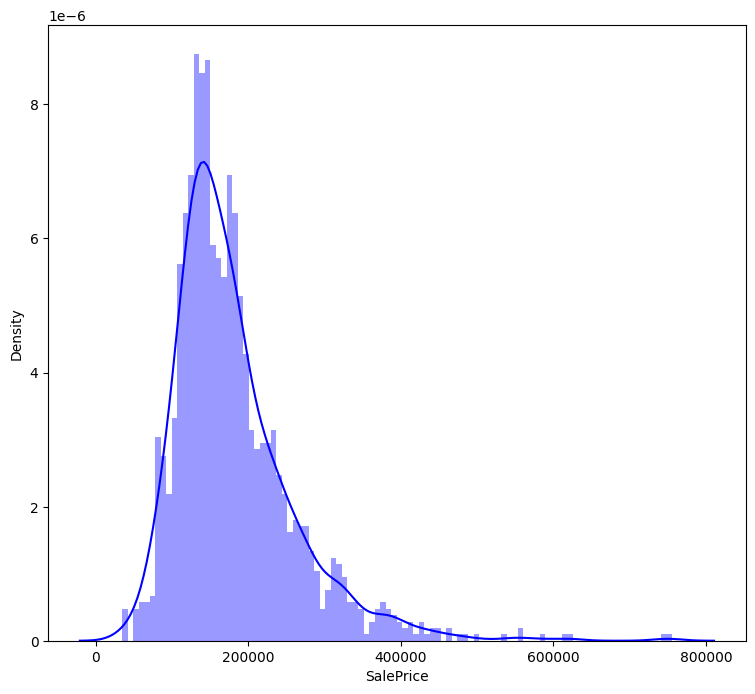

In [ ]:
# Sale price distribution
import seaborn as sns
print(train_data['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(train_data['SalePrice'], color='b', bins=100, hist_kws={'alpha': 0.4});

The SalePrice distribution shows the following:

Mean SalePrice: $180,921

Standard Deviation: $79,442, indicating significant variation in home prices.

Minimum Price: $34,900

Maximum Price: $755,000

Interquartile Range:

25th percentile: $129,975

50th percentile (median): $163,000

75th percentile: $214,000

Interpretation:

The distribution interprets that most house prices are clustered between $130k
 and $214k. The leftward skew (skewed distribution with a rightward flat tail) suggests that while the majority of the house prices fall in a low to mid range, there are a few extremely high prices (outliers like a few more than $600k and max $755K), as indicated by the maximum price being significantly higher than the mean and median.

# Exploring the Distribution of Independent Categorical Variables in train_data

This exploratory data analysis (EDA) of distribution and characteristics below of both numerical and categorical features in the dataset give the insights regrading feature engineering and model selection processes, **ensuring that the chosen predictive models are well-suited to the data.**

In [ ]:
# Analyze the distribution of each categorical feature
for column in categorical_columns:
    print(f"Distribution of {column}:")
    print(train_data[column].value_counts())
    print("\n" + "="*50 + "\n")

Distribution of MSZoning:
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64


Distribution of Street:
Street
Pave    1454
Grvl       6
Name: count, dtype: int64


Distribution of Alley:
Alley
Grvl    50
Pave    41
Name: count, dtype: int64


Distribution of LotShape:
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64


Distribution of LandContour:
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64


Distribution of Utilities:
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64


Distribution of LotConfig:
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64


Distribution of LandSlope:
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64


Distribution of Neighborhood:
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert   

# Visualization of the Independent Numerical Variables' Distribution

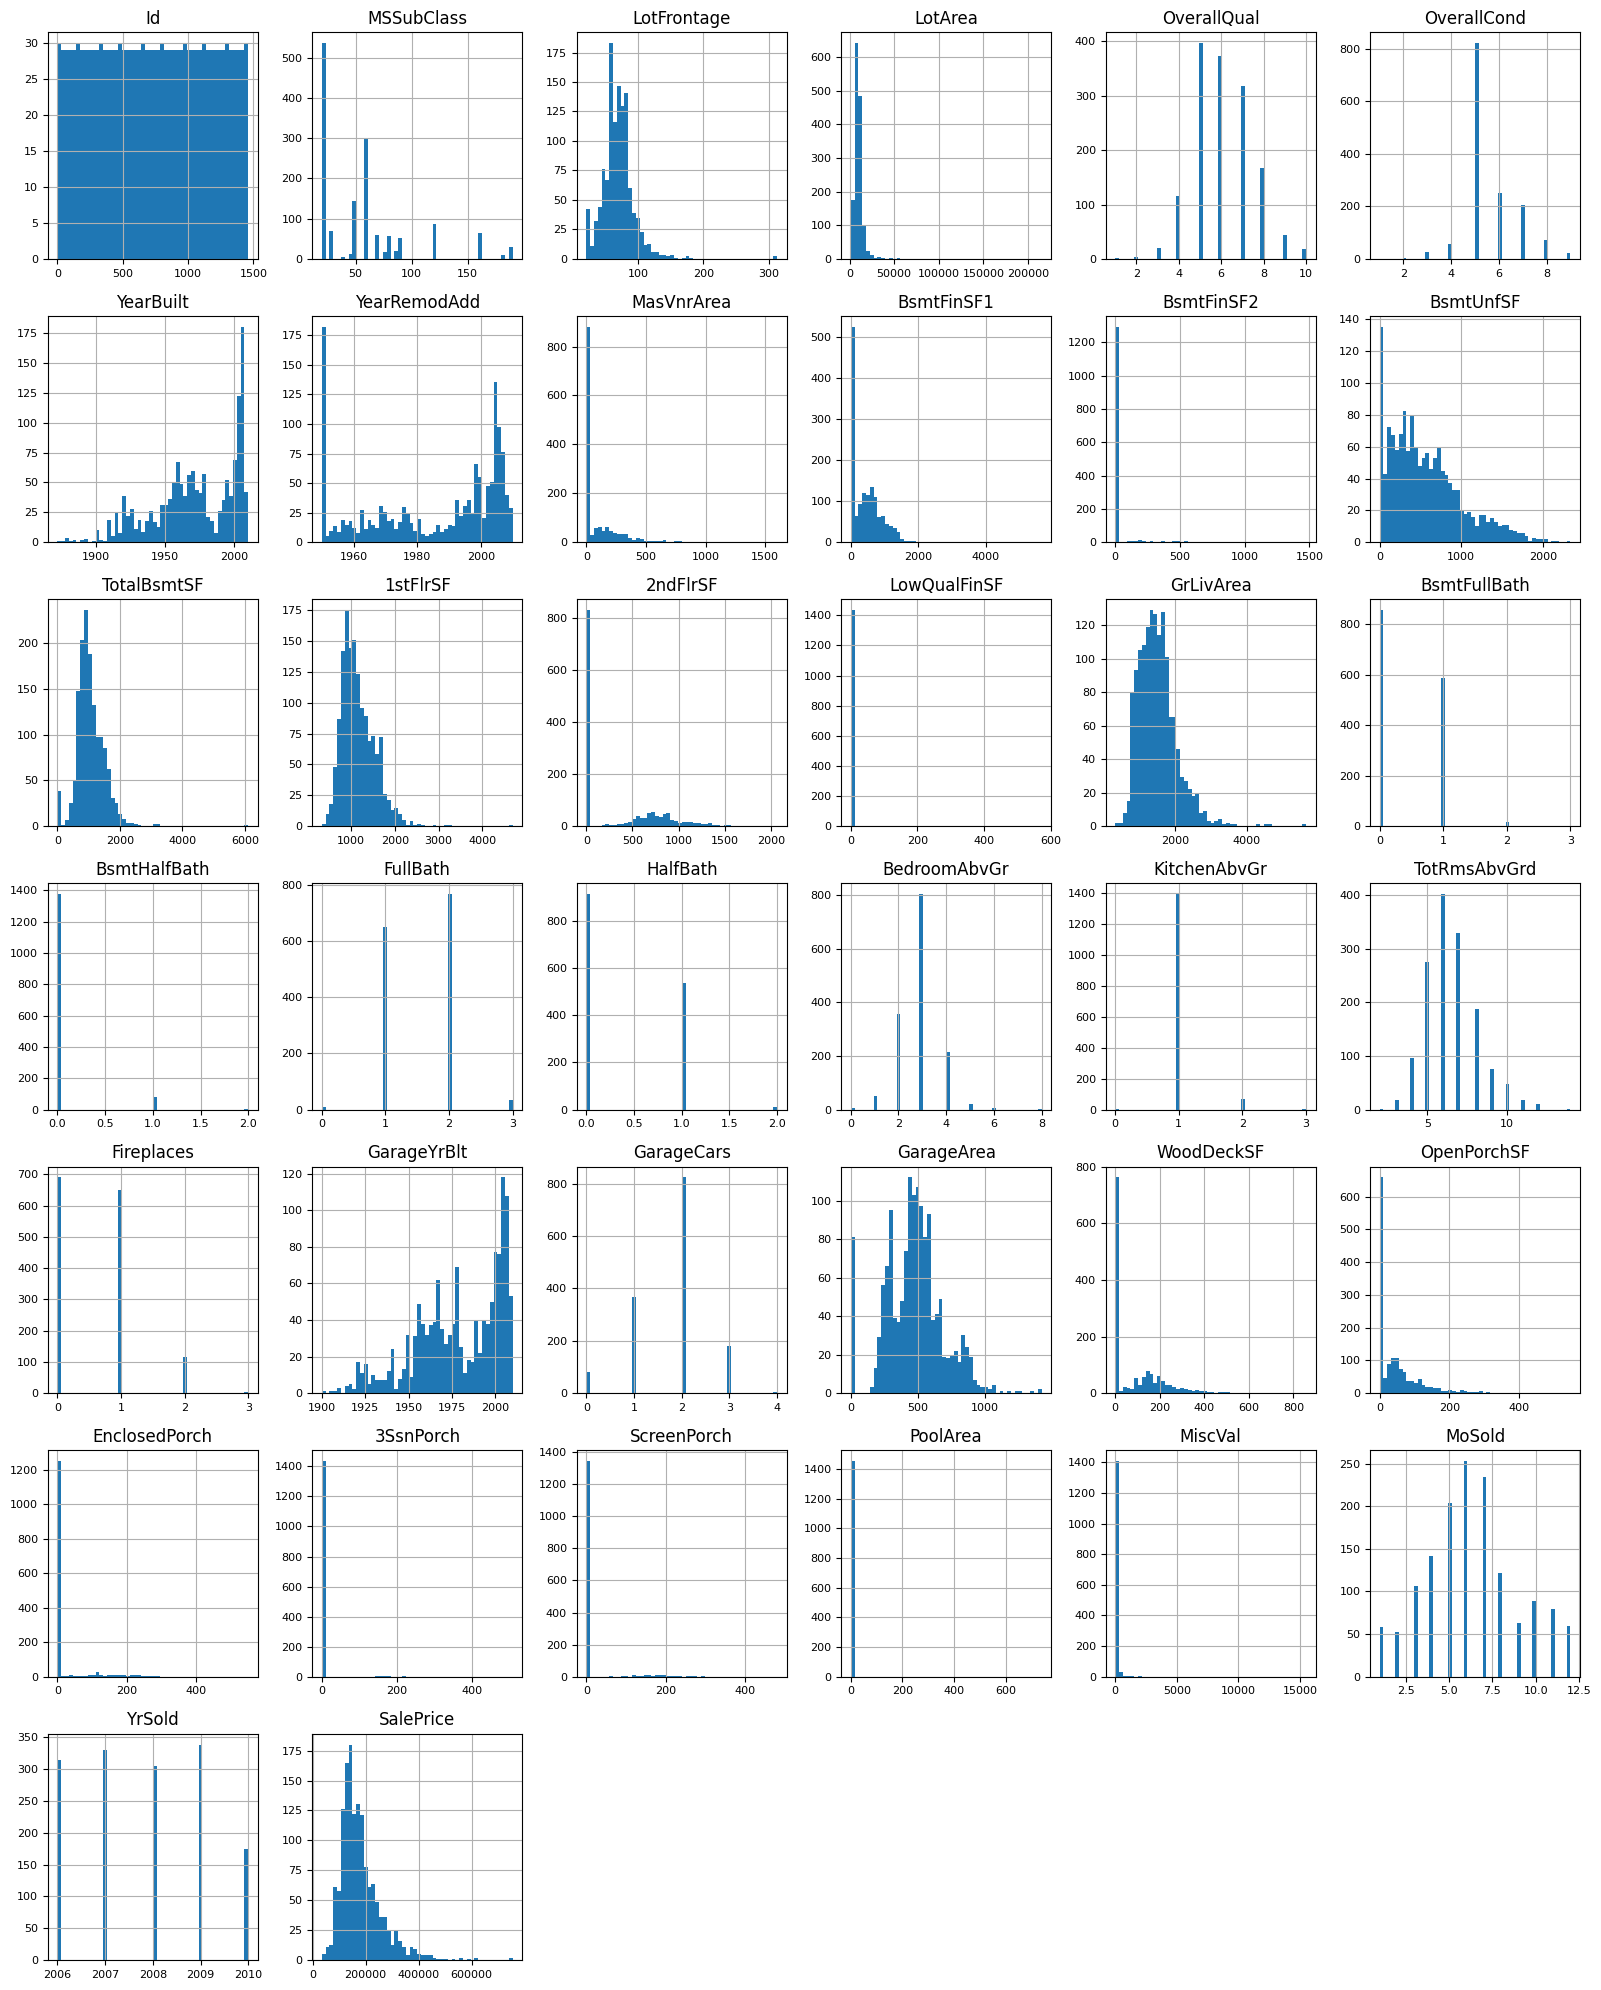

In [ ]:
# Numerical data distribution by plotting

numerical_columns = train_data.select_dtypes(include=['number'])
numerical_columns.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

The above distribution plot of the numerical independent variables in the UK house price dataset reveals several insights:

1. LotArea and GrLivArea show right-skewed distributions, indicating that while most houses fall within a moderate range, there are a few with very large areas.

2. OverallQual and OverallCond appear to have a clustered distribution, with specific quality and condition ratings being more common.

3. YearBuilt and YearRemodAdd show a historical trend, with most homes being built or remodeled after 1950, and very few before 1900.

4. TotalBsmtSF and GarageArea show positive skewness, with a small number of homes having significantly larger basement and garage areas.

5. Fireplaces, PoolArea, and ScreenPorch show many zero values, suggesting that a large portion of homes lacks these features.

This exploration helps identify key variables for modeling and potential preprocessing steps such as handling skewness or missing values.

# Correlation Heatmap between Independnet Numerical variables & Sale Price

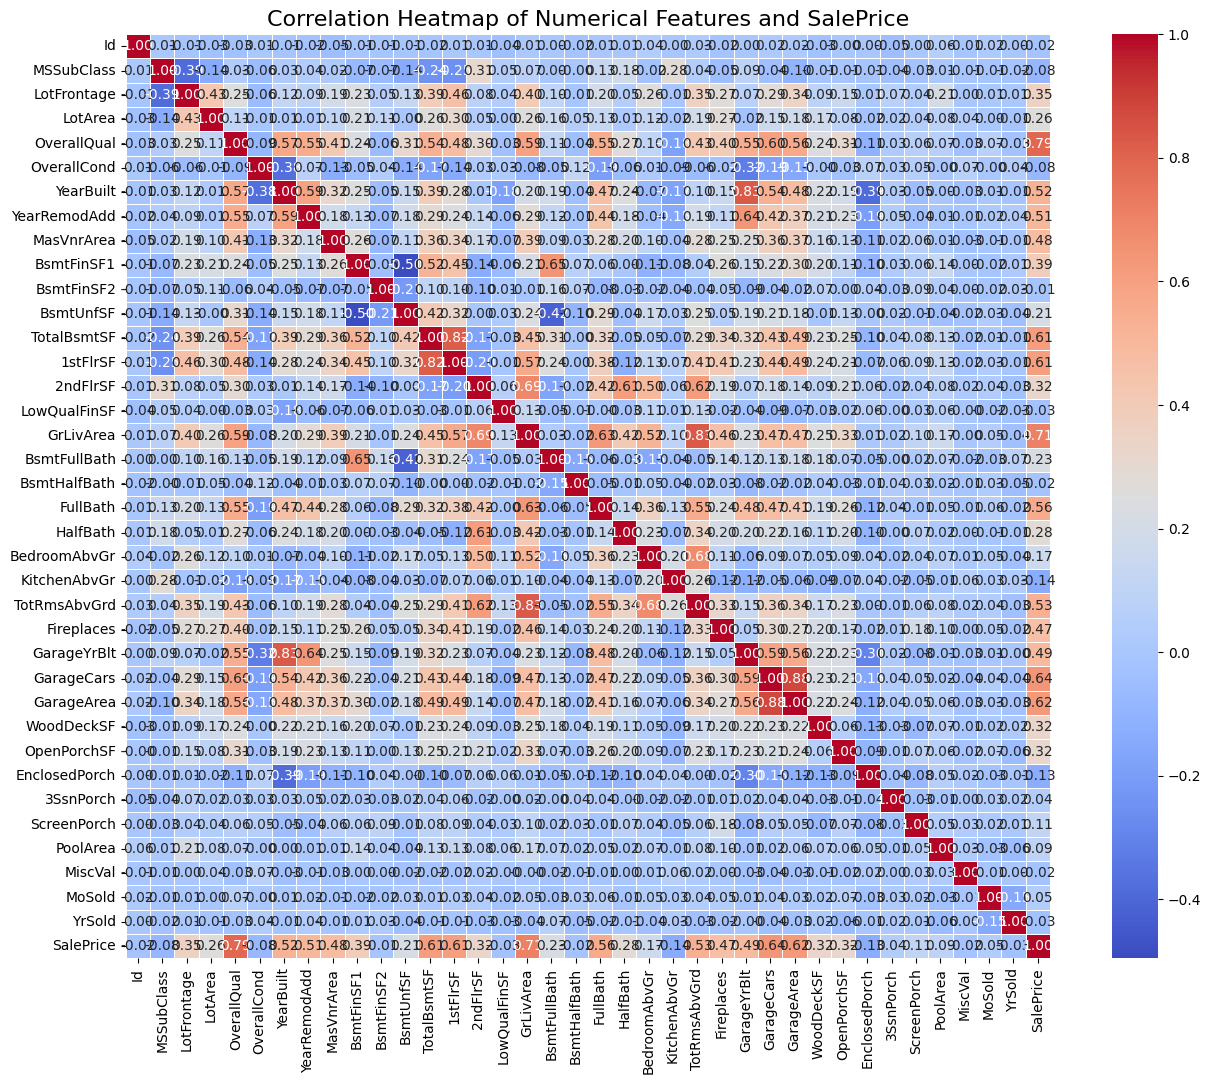

In [ ]:
# Co-relation Heatmap of Numerical features & Sale Price (Target Variable)
# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap of Numerical Features and SalePrice', fontsize=16)

# Show the plot
plt.show()

The heatmap above shows the correlation between the dependent variable SalePrice (target) and various independent numerical features in the dataset.

**Here's a brief interpretation of the correlation between SalePrice and some of the key independent variables:**

**High or Positive Correlation:**

OverallQual (Correlation: 0.79) – This feature has the highest positive correlation with SalePrice, indicating that houses with better overall quality tend to have higher sale prices.

GrLivArea (Correlation: 0.71) – The Above Ground Living Area is also highly positively correlated with SalePrice, meaning larger homes typically have higher prices.

GarageCars (Correlation: 0.64) and GarageArea (Correlation: 0.62) – Both of these garage-related features show moderate positive correlations with the sale price. Homes with larger garages or more parking space tend to be more expensive.

TotalBsmtSF (Correlation: 0.61) – The total basement area is positively correlated with the sale price, implying that a larger basement space also increases the house price.

1stFlrSF (Correlation: 0.61) – The first-floor square footage shows a positive correlation, indicating that larger first floors are associated with higher prices.

YearBuilt (Correlation: 0.52) – More recent homes (newer construction) have a moderate positive correlation with the sale price.

**Low or Negative Correlations:**

MiscVal (Correlation: -0.02) – Miscellaneous feature values have very little to no impact on the sale price.

MoSold and YrSold – The month and year the house was sold have very weak correlations with the sale price, indicating these factors don't significantly influence price.

EnclosedPorch (Correlation: 0.13) – Features like enclosed porches show weak positive correlations.

**Key Observations:**

Red cells indicate strong positive correlations, while blue cells represent weaker or negative correlations.
Features like OverallQual, GrLivArea, GarageCars, and TotalBsmtSF are the most important predictors for SalePrice.
Many features such as MSSubClass, PoolArea, and ScreenPorch show minimal impact on the sale price due to their low or near-zero correlations.

Therefore, the heatmap highlights the key numerical variables that strongly influence house prices, with OverallQual, GrLivArea, and Garage-related features having the strongest relationships with SalePrice.

# **EDA Summary & Model Selection:**

The EDA of the large dataset shows us that there are certain number of missing values availables in the dataset and many categorical variables where the former needs to be taken care of by either dropping or imputng and the later by encoding.

Now, insted of dropping/imputing the variables with missing values and encoding the categorical variables individually we will be using here two type pf predictie modelling techniques:  

1. CatBoost Predictive Model 2. TensorFlow Random Forest Model

# **Reasons for choosing the following Predictive Models:**

**CatBoost**

CatBoost is a powerful gradient boosting algorithm that excels in handling categorical features and missing values directly. Its native support for categorical feature encoding internally and robust handling of missing values automatically (by treating them as seperate category) simplifies the preprocessing pipeline.

CatBoost is optimized for speed and memory efficiency, making it suitable for medium to large datasets and complex tasks. It leverages advanced techniques such as griedent & ordered boosting to enhance predictive performance and reduce overfitting of the model. CatBoost also provides built-in tools for feature importance and model interpretation, making it an excellent choice for understanding the impact of various features on model predictions.

**TensorFlow Random Forest (TFDF) Model:**

TensorFlow Decision Forests (TFDF) offers a robust and scalable approach to decision tree-based models, including random forests. It is designed to handle large datasets and provides flexibility with feature preprocessing, such as encoding categorical features internally and handling missing values directly. It supports efficient model training through parallel processing and can leverages TensorFlow's ecosystem for scalable and efficient model training. TFDF is particularly suitable for handling large-scale data and complex feature interactions, providing strong performance in scenarios where data size and complexity are significant.

# **1. CatBoost Model**

# Data Pre-Processing for CatBoost Regression Modelling

# Splitting the Independent & Target Variable

Since, CatBoost Model internally takes care of the missing values and catergorical variables, hence, we directly go to the steps of Splitting the taget variable & dpendent vaiable for training dataset for data pre-processing purpose

In [ ]:
label = 'SalePrice'
X = train_data.drop(columns=[label, 'Id'])
y = train_data[label]
X_test = test_data.drop(columns=['Id'])

# Processing Categrical Columns to Category Type for CatBoost Model

This crucial preprocessing step prepares the categorical data for CatBoost (without the requirement of OneHotEncoding) by addressing missing values and ensuring the correct data type, facilitating effective model training and evaluation.

Also, below the same preprocessing is applied to both the training set (X) and the test set (X_test) to ensure consistency in how categorical variables are treated during model training and evaluation.

In [ ]:
cat_features = X.select_dtypes(include=['object', 'category']).columns
X[cat_features] = X[cat_features].fillna('missing').astype('category')
X_test[cat_features] = X_test[cat_features].fillna('missing').astype('category')

# Splitting train_data into two parts for Validation

Splitting the train dataset into a training set and a validation set is crucial for CatBoost to ensure robust model evaluation. The training set is used to fit the model, while the validation set helps assess its performance on unseen data during training.

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Training & Fitting the CatBoost Regression Model

CatBoostRegressor Model is initialized with parameters including the number of iterations, learning rate, depth of trees, categorical feature handling, and verbosity level for progress logging.

Model trained: fit method trains the model using X_train and y_train. The evaluation_set parameter specifies a validation set (X_valid, y_valid) to monitor model performance during training and avoid overfitting.

In [ ]:
catboost_model = CatBoostRegressor(iterations=1000,
                                   learning_rate=0.05,
                                   depth=10,
                                   cat_features=list(cat_features),
                                   verbose=200)
catboost_model.fit(X_train, y_train, eval_set=(X_valid, y_valid))

0:	learn: 74841.9282122	test: 85302.7732567	best: 85302.7732567 (0)	total: 357ms	remaining: 5m 56s
200:	learn: 12002.7601700	test: 29476.2442399	best: 29476.2442399 (200)	total: 42.1s	remaining: 2m 47s
400:	learn: 6317.1529365	test: 28605.9232760	best: 28605.9232760 (400)	total: 1m 22s	remaining: 2m 3s
600:	learn: 3753.6112756	test: 28515.7993232	best: 28513.3282247 (593)	total: 2m 6s	remaining: 1m 23s
800:	learn: 2434.6519925	test: 28465.2786304	best: 28464.4073248 (748)	total: 2m 51s	remaining: 42.7s
999:	learn: 1524.4675172	test: 28421.6860486	best: 28419.4100126 (989)	total: 3m 38s	remaining: 0us

bestTest = 28419.41001
bestIteration = 989

Shrink model to first 990 iterations.


**CatBoost Model Regression Result Interpretation:** The model effectively reduced the validation error from 85,302.77 to 28,421.69 over 1,000 iterations. The best model performance was achieved at iteration 989, indicating strong learning and convergence towards a good predictive performance.

# Predicting the Validation and test sets

After training the CatBoost model, these predictions are made on both the validation and test sets. The code catboost_model.predict(X_valid) generates predictions for the validation set to assess the model's performance on unseen data, while catboost_model.predict(X_test) provides predictions for the test set, which is used for final evaluation or results of the UK House SalePrice.

In [ ]:
# After training the model we predict the valdation and test sets respectively
catboost_val_preds = catboost_model.predict(X_valid)
catboost_test_preds = catboost_model.predict(X_test)

# R-Squared CatBoost

The R-squared metric, or coefficient of determination, is used here to evaluate how well the CatBoost model explains the variance in the target variable (SalePrice) relative to the validation set. It provides an indication of the model's performance and its ability to fit the data

In [ ]:
# Calculate R-squared for CatBoost
catboost_r2 = r2_score(y_valid, catboost_val_preds)
print(f"CatBoost R-squared on validation set: {catboost_r2:.4f}")

CatBoost R-squared on validation set: 0.8947


**Interpretation of R-squared Score:**

An R-squared score of 0.8947 on the validation set means that approximately 89.47% of the variance in house prices is explained by the model. This high score indicates that the CatBoost model has a strong predictive performance and effectively captures the underlying patterns in the data.

# Important Variables CatBoost Model

Analyzing below Feature Importances in order to Identify Key Predictors that focus on features that significantly influence house prices for better model interpretation; improve Model Performance to simplify the model by removing less important variables to enhance efficiency and reduce overfitting and to make inform Decision-Making so to Provide stakeholders with insights to guide property investments and improvements.

        Feature  Importance
16  OverallQual   20.109347
45    GrLivArea   13.369783
37  TotalBsmtSF    5.316890
3       LotArea    4.321853
29     BsmtQual    3.836968
33   BsmtFinSF1    3.635908
60   GarageCars    3.620431
42     1stFlrSF    3.550482
56  FireplaceQu    3.081510


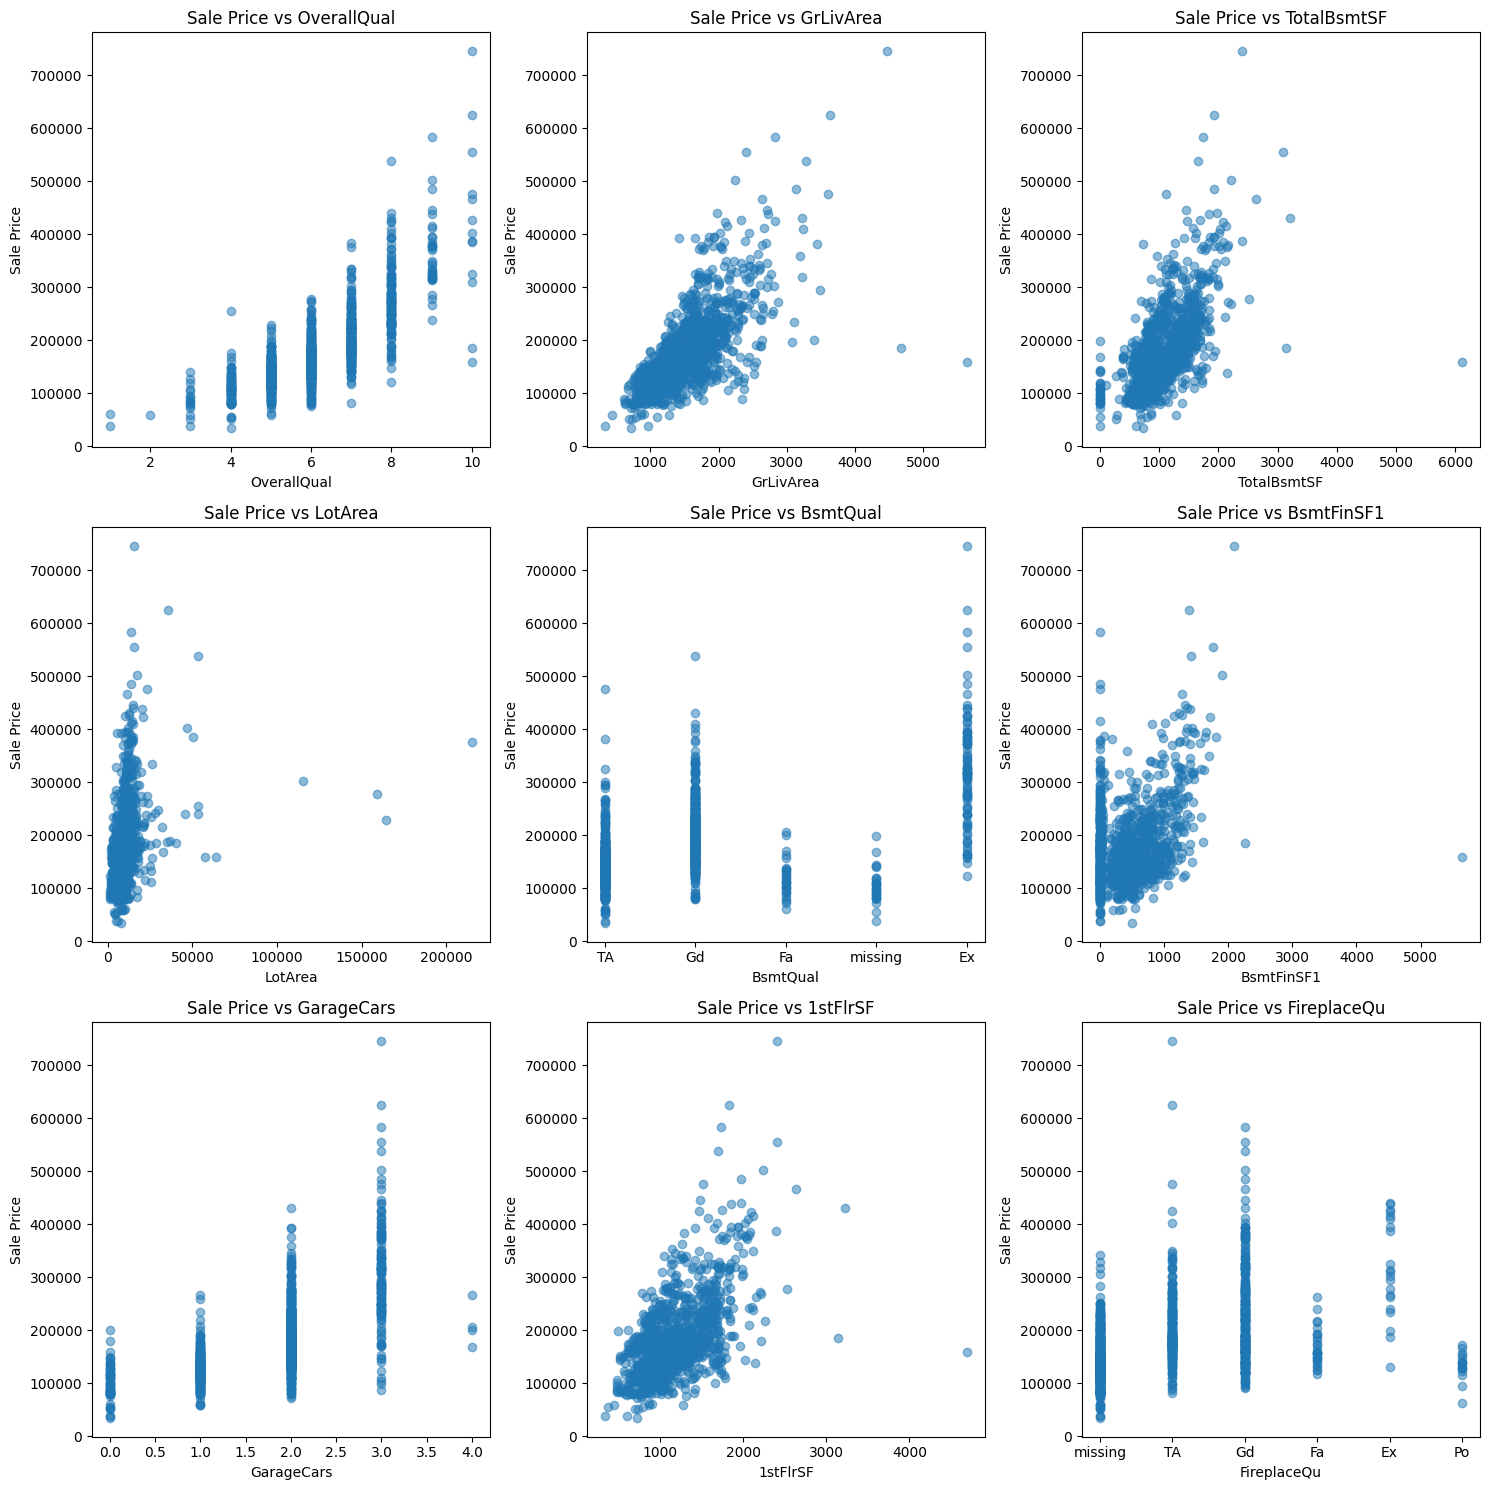

In [ ]:
# Extract and plot feature importances from CatBoost model
catboost_importances = catboost_model.get_feature_importance()
catboost_feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': catboost_importances})
filtered_feature_importance_df = catboost_feature_importance_df[catboost_feature_importance_df['Importance'] > 3]
filtered_feature_importance_df = filtered_feature_importance_df.sort_values(by='Importance', ascending=False)
print(filtered_feature_importance_df)

# Plot top features for CatBoost
top_features = filtered_feature_importance_df['Feature'].tolist()
plot_data = X_train[top_features].copy()
plot_data['SalePrice'] = y_train.values
num_features = len(top_features)
num_rows = (num_features + 2) // 3
num_cols = min(num_features, 3)

plt.figure(figsize=(15, num_rows * 5))
for idx, feature in enumerate(top_features):
    plt.subplot(num_rows, num_cols, idx + 1)
    plt.scatter(plot_data[feature], plot_data['SalePrice'], alpha=0.5)
    plt.title(f'Sale Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
plt.tight_layout()
plt.show()

**Feture Importance Results Summary:**

OverallQual (Importance: 20.11): This is the most influential feature, indicating that the overall quality of the house has the greatest impact on the sale price.

GrLivArea (Importance: 13.37): The above-ground living area is also crucial, highlighting that larger homes typically command higher prices.

TotalBsmtSF (Importance: 5.32): The size of the basement contributes significantly, though less than OverallQual and GrLivArea.

LotArea (Importance: 4.32): The size of the lot is an important factor, but its impact is smaller compared to the quality and living area.

BsmtQual (Importance: 3.84): The quality of the basement is a notable predictor, reflecting its influence on overall property value.

BsmtFinSF1 (Importance: 3.64): The finished area of the basement adds to the house's value.

GarageCars (Importance: 3.62): The number of cars that can be accommodated in the garage affects the sale price.

1stFlrSF (Importance: 3.55): The size of the first floor contributes to the overall house value.

FireplaceQu (Importance: 3.08): The quality of the fireplace is a less significant but still relevant factor in determining the sale price.

**Plot Interpretation:**

The scatter plots for these top features against the sale price visualize their relationship, showing how variations in each feature affect house prices. For example, we observe that as OverallQual increases, SalePrice generally increases, reinforcing its high importance and so on.

# **Final Predicted SalePrice(Output) from CatBoost Model**

Finally, we generate and display the predicted house sale prices using the CatBoost model for the test dataset. The output includes the unique ID for each property along with the predicted sale price.

These predictions provide an estimated value of each house based on the features used in the model. These values help assess the model's performance and provide actionable insights for pricing decisions in the real estate market.

In [ ]:
# Assuming `test_data` and `catboost_test_preds` are already defined
test_ids = test_data['Id']

# Add a dollar sign in front of SalePrice values, formatted as strings
catboost_output = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': ['$' + format(price, ',.2f') for price in catboost_test_preds]
})

# Save the output to a CSV file
catboost_output.to_csv('catboost_results.csv', index=False)

# Display the first few rows of the output to verify
print(catboost_output.head())

     Id    SalePrice
0  1461  $117,538.56
1  1462  $160,792.61
2  1463  $181,663.43
3  1464  $191,520.57
4  1465  $196,786.68


# **Conclusion CatBost:**

The CatBoost model successfully predicted UK house sale prices by utilizing key features. Its high R-squared value on the validation set and significant feature importances indicate strong performance, offering valuable insights for accurate pricing and informed investment decisions.

# **2. TensorFlow Random Forest Model (TFDF)**

# Pre-processing dataset for TFDF Model

Specifying the Target Column or Dependent Variable 'SalePrice'

In [ ]:
label = 'SalePrice'  # Replace with the name of your target variable if different

# Splitting the training data into train & valid sets

Splitting the train dataset into a training set and a validation set is crucial for TFDF model to ensure robust model evaluation. The training set is used to fit the model, while the validation set helps assess its performance on unseen data during training

In [ ]:
def split_dataset(dataset, test_ratio=0.20):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(train_data, test_ratio=0.20)
print(f"{len(train_ds_pd)} examples in training, {len(valid_ds_pd)} examples in validation.")

1151 examples in training, 309 examples in validation.


# Create Tensorflow dataframe

Converting the Pandas DataFrames (train_ds_pd and valid_ds_pd) into TensorFlow Decision Forest (TFDF) datasets using tfdf.keras.pd_dataframe_to_tf_dataset() is essential because TFDF models require data to be in TensorFlow-compatible format for training and evaluation. In short, this step bridges the gap between the Pandas data format and the requirements of TensorFlow Decision Forests for model training and evaluation.

In [ ]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task=tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task=tfdf.keras.Task.REGRESSION)

# Initializing and Training the Tensorflow Random Forest Model

The TensorFlow Decision Forests (TFDF) model is initialized with parameters tailored to the specific decision forest algorithm being used (e.g., RandomForestModel regression here). This guides the model on how to handle the target values. And, he fit() method is used to train the model on a TensorFlow dataset (train_ds), which contains features and labels. In TFDF, the model automatically handles the construction of decision trees based on the input data without requiring extensive manual configuration.

In [ ]:
rf = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"])
rf.fit(x=train_ds)

Use /tmp/tmpmeuhacpi as temporary training directory
Reading training dataset...
Training dataset read in 0:00:06.957333. Found 1151 examples.
Training model...
Model trained in 0:00:05.069920
Compiling model...
Model compiled.


In [ ]:
# Visualize the trained model
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

The image above shows a decision tree from a TensorFlow Decision Forests (TFDF) regression model predicting UK house prices. It interprets as follows:

Root Node:

The top-most node starts with the feature OverallQual (overall quality of the house), with a split threshold of 7.50.
If the OverallQual is greater than or equal to 7.50, the tree proceeds down the left side, otherwise it proceeds to the right.
The value at this node indicates the average predicted house price for the entire dataset (181727), and the number of examples considered is 1155.

Left Subtree:

If OverallQual >= 7.50, the next split is based on 1stFlrSF (first-floor square footage), with a threshold of 1889.50.
The tree further splits based on features like FullBath (number of bathrooms) and GrLivArea (above ground living area), refining predictions as it goes deeper.

Right Subtree:

If OverallQual < 7.50, the tree splits on OverallQual >= 6.50.
Features such as GrLivArea, BsmtFinSF1 (finished basement area), and neighborhood details influence predictions in this branch.
Predicted Values:

The value in each leaf node (terminal node) represents the predicted house price for the examples that fall into that path.
Each node shows how many examples reach that node (e.g., 89 examples in a certain branch).

Summary:

This above tree visualization shows how the model uses different features, such as overall quality, square footage, and number of bathrooms, to split the dataset and make increasingly refined predictions for house prices. Each decision is made based on a threshold for a feature, leading to more specific predictions as you move down the tree.

# Inspect and evaluating TFDF Model Performance

We evaluate the trained TFDF model on the validation dataset to assess its performance. Here, the rf.evaluate function computes metrics like loss (how well the model fits the data) and MSE (Mean Squared Error, indicating the model's prediction accuracy).

In [ ]:
# Evaluate the model
inspector = rf.make_inspector()
val_evaluation = rf.evaluate(x=valid_ds, return_dict=True)
for name, value in val_evaluation.items():
    print(f"{name}: {value:.4f}")

1/1 [==============================] - 1s 783ms/step - loss: 0.0000e+00 - mse: 1484041088.0000
loss: 0.0000
mse: 1484041088.0000


The above output from validation set evaluation shows:

Loss: 0.0000 (no significant error in loss calculation, likely due to how TensorFlow Decision Forest models handle it).
MSE: 747,465,408 (a high value, indicating large errors between predicted and actual house prices, suggesting room for model improvement).

### Prediction from the Validation dataset

Now, we do the predictions from the trained model on the validation dataset.
It extracts true labels from the dataset and computes the predicted values, comparing them to assess model performance.

In [ ]:
# Get predictions from the Random Forest model
def get_predictions(model, dataset):
    predictions = []
    for features, _ in dataset:
        preds = model.predict(features)
        predictions.extend(preds)
    return np.array(predictions)

# Extract true values from the validation dataset
true_values = np.concatenate([labels for _, labels in valid_ds], axis=0)
predicted_values_tfdf = get_predictions(rf, valid_ds)

10/10 [==============================] - 0s 5ms/step


The predictions ssuccessfully produces 10 prediction batches (10/10 steps), indicating the model can generate output, but further evaluation (e.g., R-squared) is needed to assess its accuracy compared to true values.

In brief, the these two steps are crucial for validating and interpreting the performance of the trained TFDF regression model, focusing on accuracy and prediction consistency.

# R-Squared TFDF Model

The R-squared metric, or coefficient of determination, is used here to evaluate how well the TensorFlow Random Forest Regression model explains the variance in the target variable (SalePrice) relative to the validation set. It provides an indication of the model's performance and its ability to fit the data

In [ ]:
def compute_r_squared(y_true, y_pred):
    return r2_score(y_true, y_pred)

# Assign the predicted values to y_pred
y_pred = predicted_values_tfdf

r_squared = compute_r_squared(true_values, y_pred)
print(f"Random Forest R-squared on validation set: {r_squared:.4f}")

Random Forest R-squared on validation set: 0.8205


Here, the R-squared value of 0.8205 for the TFDF (TensorFlow Decision Forest) model on the validation set indicates that:

82.05% of the variance in the target variable (SalePrice) is explained by the model using the input features.
This means the model is capturing a large portion of the relationship between the features and the house prices, showing strong predictive performance.
An R-squared value close to 1 indicates a good fit, so 82% suggests that the model is performing well, but there is still some unexplained variance or room for improvement.

Hence, the model has a high level of accuracy in predicting house prices based on the validation set, but it is not perfect.

# Variable Importance - TFDF Model

Finding the names of all available variable importances from the inspector. Then, it accesses and displays the importance values for the specific variable "NUM_AS_ROOT".

In [ ]:
# Get and print variable importances
importances = inspector.variable_importances()
print(f"Available variable importances:")
for importance in importances.keys():
    print("\t", importance)

Available variable importances:
	 NUM_NODES
	 INV_MEAN_MIN_DEPTH
	 SUM_SCORE
	 NUM_AS_ROOT


The above output lists the types of variable importances that the inspector has extracted from the model. Each of these metrics provides a different perspective on how important a feature is in the model's decision-making process.

In [ ]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("OverallQual" (1; #63), 100.0),
 ("Neighborhood" (4; #60), 52.0),
 ("ExterQual" (4; #22), 50.0),
 ("GarageCars" (1; #32), 35.0),
 ("GrLivArea" (1; #38), 23.0),
 ("BsmtQual" (4; #14), 9.0),
 ("TotalBsmtSF" (1; #74), 9.0),
 ("YearBuilt" (1; #77), 8.0),
 ("KitchenQual" (4; #45), 7.0),
 ("GarageArea" (1; #31), 4.0),
 ("FullBath" (1; #29), 2.0),
 ("1stFlrSF" (1; #0), 1.0)]

The above output shows the importance scores for various features based on how often they are used as root nodes in decision trees. Higher scores indicate greater importance. For example, "OverallQual" is the most important feature with a score of 101.0, while "GarageYrBlt" has the lowest score of 2.0, indicating less importance.

### Visualizing the Variable Imoprtance

The plotted bar chart below displays the NUM_AS_ROOT importance metric for the features used in the TFDF model to predict house sale prices. The NUM_AS_ROOT metric measures how frequently a feature appears at the root of decision trees, indicating its significance in splitting the data early during the prediction process.

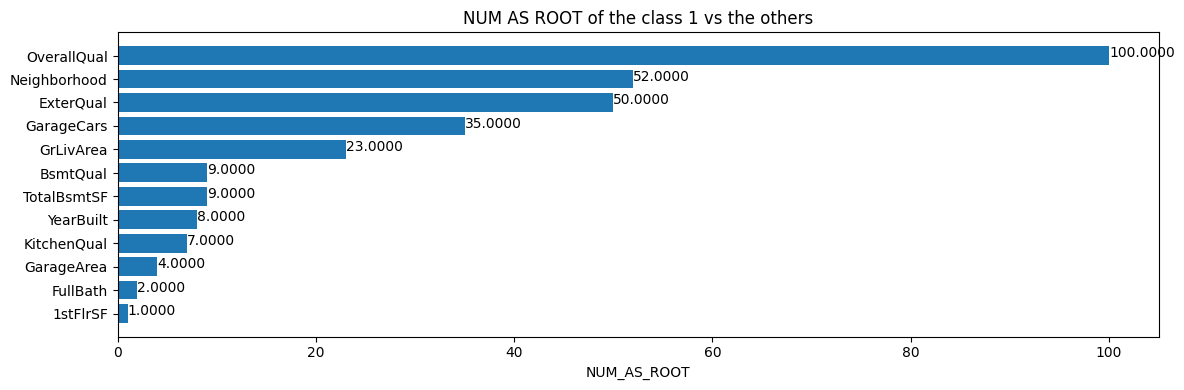

In [ ]:
# Plot the most important variables
plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = importances[variable_importance_metric]

# Extract the feature name and importance values.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

**Key Observations from the Bar Chart:**

OverallQual (101 occurrences) – This feature, representing the overall quality of the house, is the most important factor, appearing at the root of trees the most frequently, making it the strongest predictor of sale price.

ExterQual and Neighborhood (51 occurrences each) – The external quality of the house and the neighborhood where the house is located are also highly influential.

GarageCars (41 occurrences) – The number of cars the garage can hold is another significant predictor.

GrLivArea (19 occurrences) – The above-ground living area is important but less so compared to the top features.

YearBuilt, BsmtQual, KitchenQual (8, 7, 7 occurrences) – These features still play a role, indicating the house's age, basement quality, and kitchen quality.

**To conclude, overll quality-related features, location (Neighborhood), and size are the most significant factors affecting house prices.**

# Final Results: Predicting SalePrice on Test data - Tf-Df Model

We predict the SalePrice on Dataset & save the final result in 'tfdf_results.csv' file

In [ ]:
# Ensure 'Id' column is not removed from test dataset
ids = test_data['Id']
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_data, task=tfdf.keras.Task.REGRESSION)
preds = rf.predict(test_ds)

output = pd.DataFrame({'Id': ids, 'SalePrice': preds.squeeze()})
output['SalePrice'] = output['SalePrice'].apply(lambda x: f"${x:,.2f}")
print(output.head())

# Save the results to a CSV file
output.to_csv('tfdf_results.csv', index=False)

2/2 [==============================] - 1s 46ms/step
     Id    SalePrice
0  1461  $125,023.41
1  1462  $153,134.31
2  1463  $179,027.17
3  1464  $183,620.11
4  1465  $199,699.73


Finally, we generate and display the predicted house sale prices using the TensorFlow Random Forest model for the test dataset. The output includes the unique ID for each property along with the predicted sale price.

These predictions provide an estimated value of each house based on the features used in the model. These values help assess the model's performance and provide actionable insights for pricing decisions in the real estate market.

# **Comparison of Feature Importance between Tensorflow Random Forest Model and CatBoost Model**

# Combined Visualization of TFDF and CatBoost Imoprtant Variables/Features

In [ ]:
# TFDF Variable Importance
importances = inspector.variable_importances()
variable_importance_metric = "NUM_AS_ROOT"
tfdf_importances = importances[variable_importance_metric]

# Extract the feature name and importance values for TFDF
tfdf_feature_names = [vi[0].name for vi in tfdf_importances]
tfdf_feature_importances = [vi[1] for vi in tfdf_importances]

# CatBoost Variable Importance
catboost_importances = catboost_model.get_feature_importance()
catboost_feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': catboost_importances})
catboost_feature_importance_df = catboost_feature_importance_df[catboost_feature_importance_df['Importance'] > 3]
catboost_feature_importance_df = catboost_feature_importance_df.sort_values(by='Importance', ascending=False)

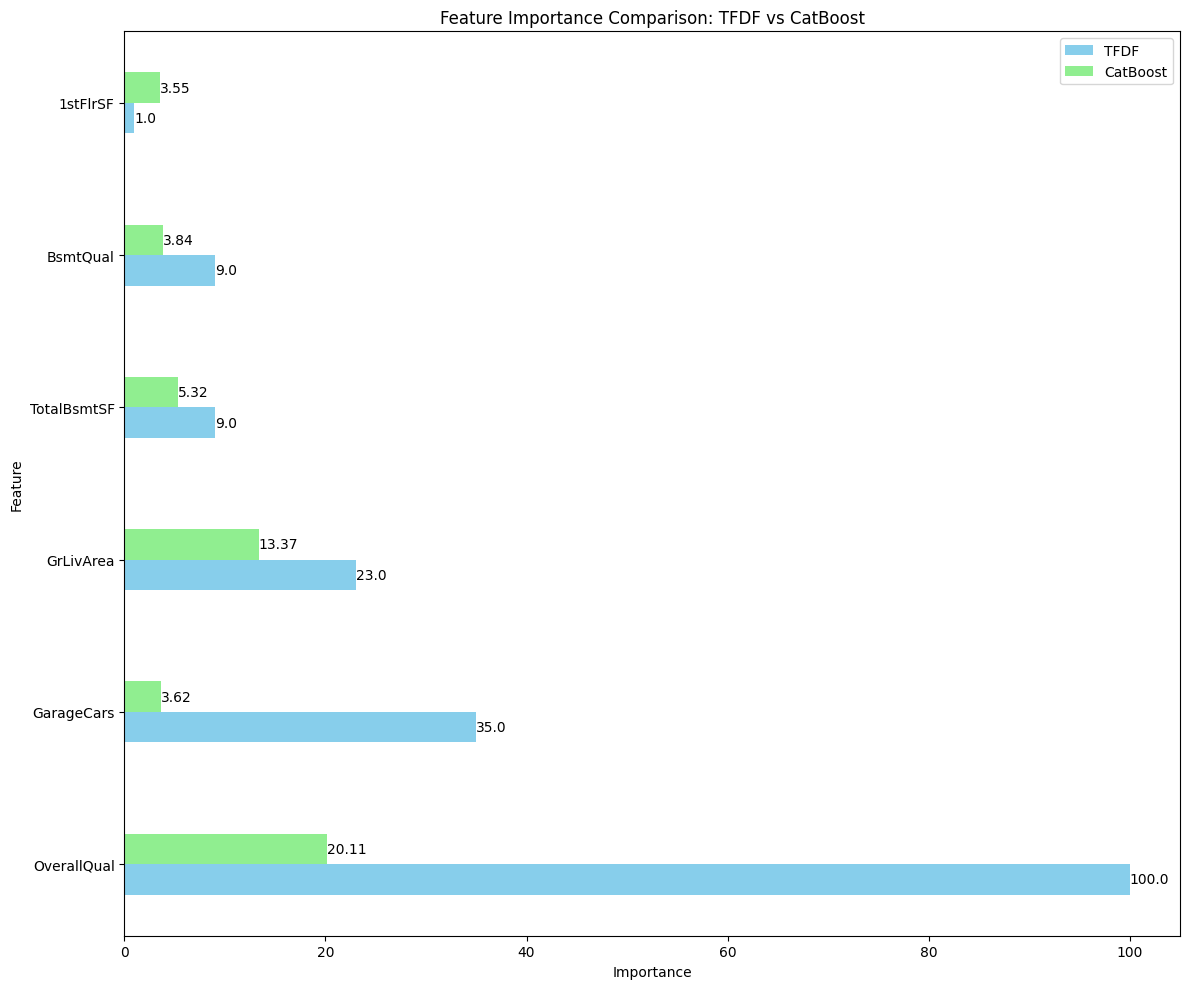

In [ ]:
# Merge and align features from both models
common_features = set(tfdf_feature_names) & set(catboost_feature_importance_df['Feature'])
tfdf_sorted = [(name, importance) for name, importance in zip(tfdf_feature_names, tfdf_feature_importances) if name in common_features]
catboost_sorted = catboost_feature_importance_df[catboost_feature_importance_df['Feature'].isin(common_features)]

tfdf_sorted = sorted(tfdf_sorted, key=lambda x: -x[1])
catboost_sorted = catboost_sorted.sort_values(by='Importance', ascending=False)

tfdf_features, tfdf_importances = zip(*tfdf_sorted)
catboost_features = catboost_sorted['Feature']
catboost_importances = catboost_sorted['Importance']

# Create a DataFrame for plotting
comparison_df = pd.DataFrame({
    'Feature': list(tfdf_features),
    'TFDF Importance': list(tfdf_importances),
    'CatBoost Importance': [catboost_importances[catboost_features[catboost_features == f].index[0]] if f in catboost_features.values else 0 for f in tfdf_features]
})

# Sort the DataFrame by feature importance in ascending order
comparison_df = comparison_df.sort_values(by=['TFDF Importance', 'CatBoost Importance'], ascending=[False, False])

# Plot the feature importances side by side (horizontal bars)
fig, ax = plt.subplots(figsize=(12, 10))

bar_height = 0.2
index = np.arange(len(comparison_df))

bar1 = ax.barh(index - bar_height / 2, comparison_df['TFDF Importance'], bar_height, label='TFDF', color='skyblue')
bar2 = ax.barh(index + bar_height / 2, comparison_df['CatBoost Importance'], bar_height, label='CatBoost', color='lightgreen')

ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importance Comparison: TFDF vs CatBoost')
ax.set_yticks(index)
ax.set_yticklabels(comparison_df['Feature'])
ax.legend()

# Label each bar with its value
for bar in bar1 + bar2:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, round(bar.get_width(), 2), va='center')

plt.tight_layout()
plt.show()

Summary of TFDF and CatBoost Model Feature Importance Comparison :

The comparison plot illustrates that both models agree on the overall importance of features like OverallQual and GrLivArea, but TFDF tends to emphasize the significance of GarageCars and BsmtQual more than CatBoost. These differences in feature importance can guide decisions in model refinement and suggest that TFDF might be more sensitive to garage size and basement quality when predicting house prices.

# **Conclusion**

From the above two model analysis we can observe, for predicting UK house sale prices, CatBoost demonstrates slightly better performance with an R-squared value of 0.89, compared to 0.82 for TFDF. This indicates that CatBoost explains a higher proportion of the variance in house prices and provides more accurate predictions overall.

However, the feature importance comparison suggests that TFDF places greater emphasis on specific features like GarageCars and BsmtQual, which may be more relevant for certain properties. In contrast, CatBoost assigns more balanced importance across a broader range of features, including OverallQual and GrLivArea, making it a well-rounded choice.

**Recommendations for Stakeholders:**

Model Selection:

Based on performance, CatBoost (Gradient boosting model) is the preferable model for predicting UK house prices. It offers higher accuracy and balances key features more effectively than TensorFlow Random Forest Model.

Investment and Improvement Focus:

Since both models highlight OverallQual and GrLivArea as critical factors, stakeholders should prioritize improvements in overall property quality and living area to maximize property value. Additionally, for properties with garages and basements, TFDF’s emphasis suggests that enhancing these features can also significantly impact the sale price.

Lastly, Investors can consider blending insights from both models to get a better idea of future sale price of UK houses. For instance, leveraging the information of TFDF's sensitivity to GarageCars and BsmtQual may improve their saleprice predictions for properties where these features are highly relevant.

# Author

Debolina Dutta

LinkedIn: https://www.linkedin.com/in/duttadebolina/